In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Load the data

data = pd.read_csv("PlayerData - Sheet1 (3).csv")

In [45]:
# Preprocessing

# Define features and target
features = [
    "MP (min played)", "PTS", "TRB (tot rb)", "AST", "FG%", "3P%", "FT%",
    "M/P min per game", "PTS/ per game", "TRB per game", "AST per game"
]
target = "WS/48"

# Handling missing values (Fill with mean for simplicity)
data[features] = data[features].fillna(data[features].mean())
data[target] = data[target].fillna(data[target].mean())

# Define X (features) and y (target)
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Train

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Predict and Evaluate

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print the actual vs predicted values for WS/48
prediction_results = pd.DataFrame({
    'Actual WS/48': y_test,
    'Predicted WS/48': y_pred
})

print(prediction_results.head())  # Print first few rows to inspect the predictions

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


     Actual WS/48  Predicted WS/48
203         0.143          0.08115
266         0.015         -0.00649
152         0.013         -0.03923
9           0.026          0.03144
233         0.025          0.05957
Mean Squared Error: 0.01
R-squared: 0.47


In [48]:
# Feature Importance

importances = rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

MP (min played): 0.01
PTS: 0.01
TRB (tot rb): 0.01
AST: 0.02
FG%: 0.76
3P%: 0.05
FT%: 0.03
M/P min per game: 0.03
PTS/ per game: 0.03
TRB per game: 0.02
AST per game: 0.02


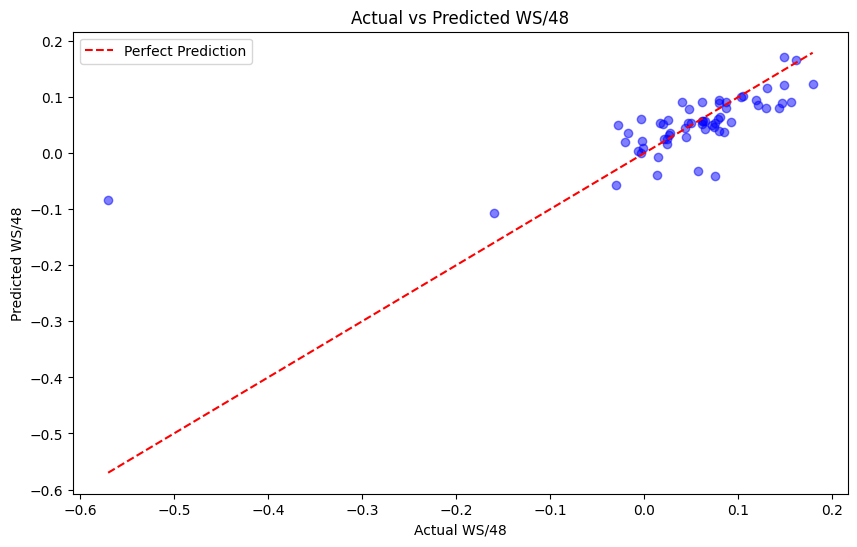

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with actual and predicted WS/48
prediction_results = pd.DataFrame({
    'Actual WS/48': y_test,
    'Predicted WS/48': y_pred
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prediction_results['Actual WS/48'], prediction_results['Predicted WS/48'], color='blue', alpha=0.5)

# Add a reference line (y=x) for perfect predictions
plt.plot([min(prediction_results['Actual WS/48']), max(prediction_results['Actual WS/48'])],
         [min(prediction_results['Actual WS/48']), max(prediction_results['Actual WS/48'])],
         color='red', linestyle='--', label="Perfect Prediction")

# Add labels and title
plt.xlabel('Actual WS/48')
plt.ylabel('Predicted WS/48')
plt.title('Actual vs Predicted WS/48')

# Show the plot
plt.legend()
plt.show()